# Graph theory with Networkx

Aitor Morales-Gregorio

*Python Module of the Week* on the 29.12.2019 @ INM-6 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Cc-by-nc_icon.svg/1920px-Cc-by-nc_icon.svg.png" width="80" height="80" align="left" />

## Installation
At best in a fresh environment with python3 and matplotlib:
```
conda env create -n nx python=3 matplotlib
pip install networkx
```

You can also use the environment file in this repository 'env_nx.yml' and create your environment simply by:
```
conda env create -f env_nx.yml
```
And activate it:
```
conda activate nx
```

## Intro

The following basic graph types are provided as Python classes:

`Graph`

This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.

`DiGraph`

Directed graphs, that is, graphs with directed edges. Provides operations common to directed graphs, (a subclass of Graph).

`MultiGraph`

A flexible graph class that allows multiple undirected edges between pairs of nodes. The additional flexibility leads to some degradation in performance, though usually not significant.

`MultiDiGraph`

A directed version of a MultiGraph.


## Creating a graph from zero

This tutorial partially follows the tutorials in the official NetworkX  [documentation](https://networkx.github.io/documentation/stable/tutorial.html) (which is very good!)

### Undirected graphs

In [1]:
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
from random import randint
from pprint import pprint

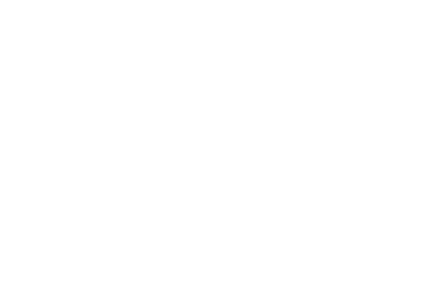

In [3]:
# Let's create a fresh network!
G = nx.Graph()
nx.draw(G)

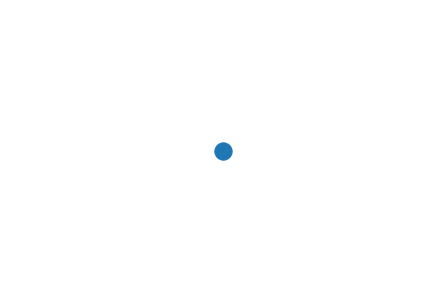

In [4]:
# You can add a node like so
G.add_node(1)
nx.draw(G)

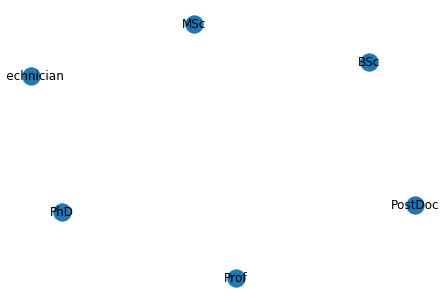

In [5]:
# Or you can add other more meaningful nodes all from a list
G.clear()
G.add_nodes_from(['BSc', 'MSc', 'PhD', 'PostDoc', 'Prof', 'Technician'])
nx.draw(G, with_labels=True)

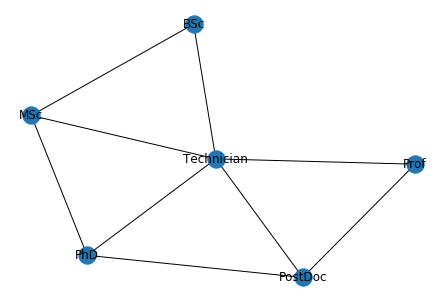

In [6]:
# Adding edges is pretty much the same, just with tuples instead of single values
G.add_edge('BSc', 'MSc')
G.add_edges_from([('MSc', 'PhD'), ('PhD', 'PostDoc'), ('PostDoc', 'Prof')])
for node in list(G.nodes):
    G.add_edge('Technician', node)
nx.draw(G, with_labels=True)

In [7]:
# One can get the adjacency matrix
A = nx.adjacency_matrix(G)
print('-- This is a Scipy sparse matrix:\n')
print(A)

print('\n-- This is a numpy matrix:\n')
print(A.todense())

-- This is a Scipy sparse matrix:

  (0, 1)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 5)	1
  (2, 1)	1
  (2, 3)	1
  (2, 5)	1
  (3, 2)	1
  (3, 4)	1
  (3, 5)	1
  (4, 3)	1
  (4, 5)	1
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	1
  (5, 4)	1
  (5, 5)	1

-- This is a numpy matrix:

[[0 1 0 0 0 1]
 [1 0 1 0 0 1]
 [0 1 0 1 0 1]
 [0 0 1 0 1 1]
 [0 0 0 1 0 1]
 [1 1 1 1 1 1]]


In [8]:
# Degree
list(G.degree())

[('BSc', 2),
 ('MSc', 3),
 ('PhD', 3),
 ('PostDoc', 3),
 ('Prof', 2),
 ('Technician', 7)]

In [9]:
# Clustering coefficient
nx.clustering(G)

{'BSc': 1.0,
 'MSc': 0.6666666666666666,
 'PhD': 0.6666666666666666,
 'PostDoc': 0.6666666666666666,
 'Prof': 1.0,
 'Technician': 0.4}

In [10]:
# Betweenness centrality
nx.betweenness_centrality(G)

{'BSc': 0.0,
 'MSc': 0.05,
 'PhD': 0.05,
 'PostDoc': 0.05,
 'Prof': 0.0,
 'Technician': 0.45}

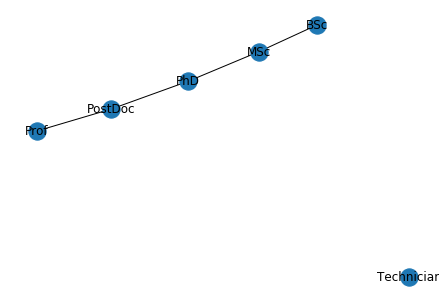

{0: 1.0, 1: 0.6666666666666666}

In [11]:
# Rich club coefficient
## nx.rich_club_coefficient(G) --> ERROR: Not implemented for graphs with self loops

# I destroy edges by removing the node
G.remove_node('Technician')
G.add_node('Technician')

nx.draw(G, with_labels=True)
plt.show()
nx.rich_club_coefficient(G)

[Link](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.richclub.rich_club_coefficient.html#networkx.algorithms.richclub.rich_club_coefficient)  to documentation of rich club coefficient function 

### Weighted graphs

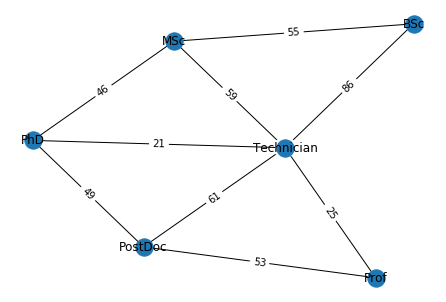

In [12]:
WG = nx.Graph()
WG.add_nodes_from(['BSc', 'MSc', 'PhD', 'PostDoc', 'Prof', 'Technician'])
'''
Any keyword argument passed to an edge can be treated as a weight
'''
WG.add_edge('BSc', 'MSc', friendliness=randint(10, 99))
WG.add_edge('MSc', 'PhD', friendliness=randint(10, 99))
WG.add_edge('PhD', 'PostDoc', friendliness=randint(10, 99))
WG.add_edge('PostDoc', 'Prof', friendliness=randint(10, 99))

for node in list(WG.nodes):
    WG.add_edge('Technician', node, friendliness=randint(10, 99))

'''
One can define at which position each node should be plotted
This can be done manually when creating the nodes:
>>> G.add_node(label, pos=(x,y))
...
>>> pos = nx.get_node_attributes(G, 'pos')

Or much more conveniently, using some optimized algorithm like
>> nx.spring_layout(G)
'''
pos = nx.spring_layout(WG)    

nx.draw(WG, pos, with_labels=True)

# Additionally we can print the edge weights
labels = nx.get_edge_attributes(WG,'friendliness')
foo = nx.draw_networkx_edge_labels(WG, pos, edge_labels=labels)

In [13]:
# Degree
print('Degrees of unweighted graph:')
pprint(list(WG.degree()))

print('\nDegrees of weighted graph (a.k.a. intensity):')
pprint(list(WG.degree(weight='friendliness')))

Degrees of unweighted graph:
[('BSc', 2),
 ('MSc', 3),
 ('PhD', 3),
 ('PostDoc', 3),
 ('Prof', 2),
 ('Technician', 7)]

Degrees of weighted graph (a.k.a. intensity):
[('BSc', 141),
 ('MSc', 160),
 ('PhD', 116),
 ('PostDoc', 163),
 ('Prof', 78),
 ('Technician', 320)]


In [14]:
# Clustering coefficient
print('Clustering of unweighted graph:')
pprint(nx.clustering(WG))

print('\nClustering of weighted graph:')
pprint(nx.clustering(WG, weight='friendliness'))

Clustering of unweighted graph:
{'BSc': 1.0,
 'MSc': 0.6666666666666666,
 'PhD': 0.6666666666666666,
 'PostDoc': 0.6666666666666666,
 'Prof': 1.0,
 'Technician': 0.4}

Clustering of weighted graph:
{'BSc': 0.759869943142654,
 'MSc': 0.402451457458832,
 'PhD': 0.30319976941871485,
 'PostDoc': 0.3216208702523484,
 'Prof': 0.5027477317347426,
 'Technician': 0.21722169831335408}


### Directed graphs

To create a directed graph you have to use:

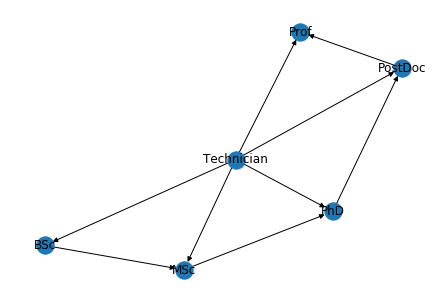

In [15]:
# The only difference is that the new graph is an instance of nx.DiGraph instead of nx.Graph
DG = nx.DiGraph()
DG.add_nodes_from(['BSc', 'MSc', 'PhD', 'PostDoc', 'Prof', 'Technician'])
'''
When generating edges:
* Source: first tuple element
* Target: second tuple element
'''
DG.add_edges_from([('BSc', 'MSc'), ('MSc', 'PhD'), ('PhD', 'PostDoc'), ('PostDoc', 'Prof')])
for node in list(G.nodes):
    DG.add_edge('Technician', node)
nx.draw(DG, with_labels=True)

## Creating a random (directed) graph

NetworkX offers a ton of [graph generating functions](https://networkx.github.io/documentation/networkx-2.3/reference/generators.html)!

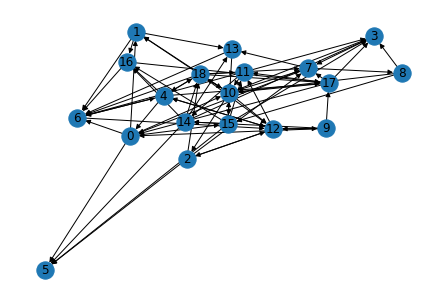

 Documentation for nx.fast_gnp_random_graph
Returns a $G_{n,p}$ random graph, also known as an Erdős-Rényi graph or
    a binomial graph.

    Parameters
    ----------
    n : int
        The number of nodes.
    p : float
        Probability for edge creation.
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.
    directed : bool, optional (default=False)
        If True, this function returns a directed graph.

    Notes
    -----
    The $G_{n,p}$ graph algorithm chooses each of the $[n (n - 1)] / 2$
    (undirected) or $n (n - 1)$ (directed) possible edges with probability $p$.

    This algorithm [1]_ runs in $O(n + m)$ time, where `m` is the expected number of
    edges, which equals $p n (n - 1) / 2$. This should be faster than
    :func:`gnp_random_graph` when $p$ is small and the expected number of edges
    is small (that is, the graph is sparse).

    See Also
    --------
    g

In [16]:
# A more realistic network
G_r = nx.fast_gnp_random_graph(n=19, p=0.2, seed=None, directed=True)
nx.draw(G_r, with_labels=True)
plt.show()
print("\033[1m Documentation for nx.fast_gnp_random_graph\033[0m")
print(nx.fast_gnp_random_graph.__doc__)

In [17]:
# Adjacency matrix
A = nx.adjacency_matrix(G_r)
print('\n-- This is a numpy matrix:\n')
print(A.todense())


-- This is a numpy matrix:

[[0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0]
 [0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0]]


## USE CASE: CoCoMac tract-tracing connectivity data

Networkx offers a wide variety of IO functions for most standard formats:
* Supported formats: JSON, pickle, YAML... (other graph specific formats)
* Not suported formats: CSV, HDF, NPY

See all the possibilities for [IO in the documentation](https://networkx.github.io/documentation/stable/reference/readwrite/index.html#readwrite)

This section shows an example of how to load long-range connectivity data (given as a .json file) using pandas.

In [18]:
import pandas as pd
df = pd.read_json('cocomac.json')
df.head()

,1,2,3a,3b,4,5,6,7a,7b,46,...,V3a,V4,V4d,V4t,V4v,VOT,VP,TF,TH,AIT
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3a,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3b,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


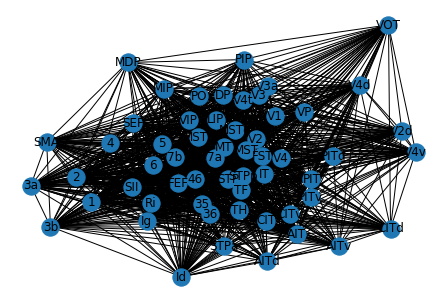

In [19]:
G = nx.convert_matrix.from_pandas_adjacency(df)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

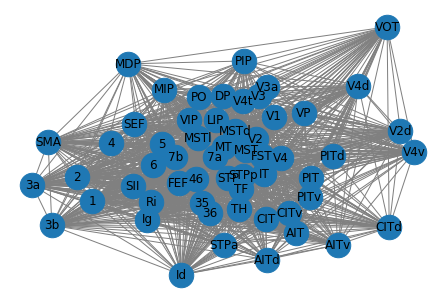

In [20]:
# One can also change the drawing style of course
nx.draw(G, pos, with_labels=True, node_size=600, edge_color='gray')
plt.show()

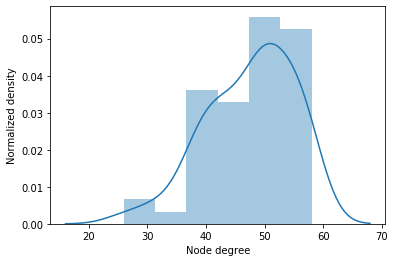

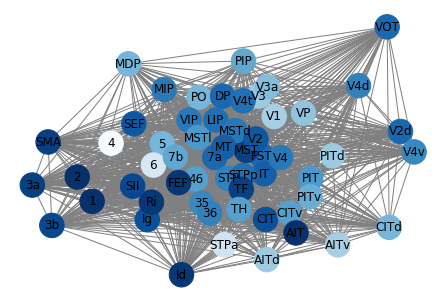

In [21]:
import seaborn as sns
degrees = [d for n, d in G.degree()]
sns.distplot(degrees)
plt.ylabel('Normalized density')
plt.xlabel('Node degree')
plt.show()
nx.draw(G, pos, with_labels=True, node_color=degrees, node_size=600, cmap=plt.cm.Blues, edge_color='gray')
plt.show()

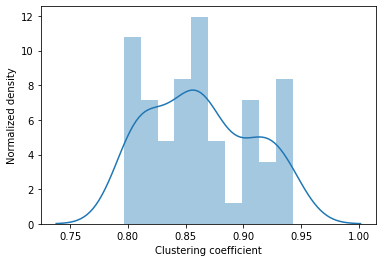

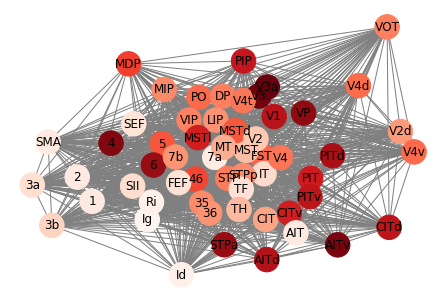

In [22]:
# Clustering coefficient
c_dict = nx.clustering(G)
c_coef = list(c_dict.values())
sns.distplot(c_coef, bins=10)
plt.ylabel('Normalized density')
plt.xlabel('Clustering coefficient')
plt.show()
nx.draw(G, pos, with_labels=True, node_color=c_coef, node_size=600, cmap=plt.cm.Reds, edge_color='gray')
plt.show()

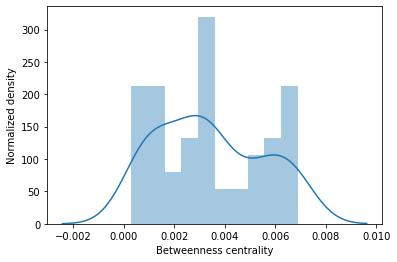

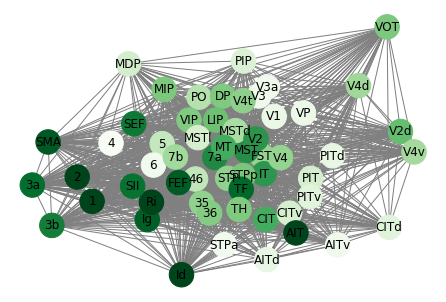

In [23]:
# Betweenness centrality
bc_dict = nx.betweenness_centrality(G)
bc = list(bc_dict.values())
sns.distplot(bc, bins=10)
plt.ylabel('Normalized density')
plt.xlabel('Betweenness centrality')
plt.show()
nx.draw(G, pos, with_labels=True, node_color=bc, node_size=600, cmap=plt.cm.Greens, edge_color='gray')
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
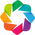

In [28]:
import holoviews as hv
import math
hv.extension('bokeh', 'matplotlib')

In [56]:
k = 2/(math.sqrt(G.order()))
hv_obj = hv.Graph.from_networkx(G, nx.spring_layout, iterations=1000, k=k)
labels = hv.Labels(hv_obj.nodes, ['x', 'y'], 'index')
(hv_obj.options(width=600, height=400) * labels.opts(text_font_size='8pt', text_color='white', bgcolor='gray'))

:Overlay
   .Graph.I  :Graph   [start,end]   (weight)
   .Labels.I :Labels   [x,y]   (index)